<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/FreecodeCamp_DeepLizard_Keras_with_Tensorflow_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FreecodeCamp DeepLizard Keras with Tensorflow Course

> Written notes on the tutorial by [DeepLizard](https://youtube.com/deeplizard) and [FreeCodeCamp](https://www.youtube.com/channel/UC8butISFwT-Wl7EV0hUK0BQ): https://www.youtube.com/watch?v=qFJeN9V1ZsI

---

### Data preparation and processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.python.client import device_lib

In [3]:
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13387046439419927936
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3059115622
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7250165879099588213
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [7]:
train_samples, train_labels = [], []

For this simple task, we'll be creating our own example data set.

#### Data Creation

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.



In [8]:
young_population = old_population = int(2100/2)

minority = int(0.05*old_population)*2

print (minority)

104


So the minority population is around 100 people (50 old and 50 young)

In [9]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

    ### we have added 100 of the minority to the data

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [10]:
print (len(train_samples), len(train_labels))

2100 2100


This code creates 2100 samples and stores the age of the individuals in the train_samples list and stores whether or not the individuals experienced side effects in the train_labels list.

Convert the data to numpy arrays:

In [11]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
### before shuffling
print (train_labels[:10], train_samples[:10])

train_labels, train_samples = shuffle(train_labels, train_samples) ### consistent order; so keeps track of the correspondence bw the 2 as we shuffle
print (train_labels[:10], train_samples[:10])


[1 0 1 0 1 0 1 0 1 0] [22 70 40 67 51 98 29 75 57 65]
[0 0 1 1 0 1 1 1 1 0] [18 32 79 77 25 89 81 72 82 23]


In [12]:
### test for shuffle
t1 = np.array([23,34,12,11,34,65,32])
t2 = np.array([1,1,0,0,0,1,1])

t1_new,t2_new = shuffle(t1,t2)

print(t1_new, t2_new)

[34 32 65 11 12 34 23] [1 1 1 0 0 0 1]


> Ok, so shuffle does keep track of the correspondence

In this form, we now have the ability to pass the data to the model because it is now in the required format, however, before doing that, we'll first scale the data down to a range from 0 to 1.

We'll use scikit-learn’s MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.

We reshape the data as a technical requirement just since the fit_transform() function doesn’t accept 1D data by default.



In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(X=train_samples.reshape(-1, 1))

print (scaled_train_samples[:5])

[[0.05747126]
 [0.2183908 ]
 [0.75862069]
 [0.73563218]
 [0.13793103]]


### Create An Artificial Neural Network With TensorFlow's Keras API

---



In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [15]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print (physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


set_memory_growth() attempts to allocate only as much GPU memory as needed at a given time, and continues to allocate more when needed. If this is not enabled, then we may end up running into the error below when we train the model later.

`Blas GEMM launch failed`

In [16]:
tf.config.experimental.set_memory_growth(device=physical_devices[0], enable=True)

#### Build A Sequential Model


In [17]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

As discussed, we’ll be training our network on the data that we generated and processed in the previous episode, and recall, this data is one-dimensional. The input_shape parameter expects a tuple of integers that matches the shape of the input data, so we correspondingly specify (1,) as the input_shape of our one-dimensional data.

You can think of the way we specify the input_shape here as acting as an **implicit input layer**. The input layer of a neural network is the underlying raw data itself, therefore we don't create an explicit input layer. **This first Dense layer that we're working with now is actually the first hidden layer**.

Lastly, an optional parameter that we’ll set for the Dense layer is the activation function to use after this layer. We’ll use the popular choice of relu. Note, if you don’t explicitly set an activation function, then Keras will use the linear activation function.

Our next layer will also be a Dense layer, and this one will have 32 nodes. The choice of how many neurons this node has is also arbitrary, as the idea is to create a simple model, and then test and experiment with it. If we notice that it is insufficient, then at that time, we can troubleshoot the issue and begin experimenting with changing parameters, like number of layers, nodes, etc.

Lastly, we specify the output layer. This layer is also a Dense layer, and it will have 2 neurons. This is because we have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.

This time, the activation function we’ll use is softmax, which will give us a probability distribution among the possible outputs.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### How do we arrive at 642 trainable params:

1. 1 ip. Then 1 hidden layer with 16 nodes. So 16 connections (wts) and 16 (biases): `16x2`

2. Next layer has 32 nodes. `16*32` wts + 32 biases: `(16*32)+32`

3. Last layer has 2 nodes. So `32*2` wts + 2 biases: `32*2+2`

`16*2 + (16*32)+32 + (32*2)+2 = 642`

### Train An Artificial Neural Network With Keras

---

The first thing we need to do to get the model ready for training is call the compile() function on it.



In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2, shuffle=True, )

Train on 2100 samples
Epoch 1/30
2100/2100 - 1s - loss: 0.7020 - accuracy: 0.5276
Epoch 2/30
2100/2100 - 0s - loss: 0.6751 - accuracy: 0.6824
Epoch 3/30
2100/2100 - 0s - loss: 0.6501 - accuracy: 0.7510
Epoch 4/30
2100/2100 - 0s - loss: 0.6278 - accuracy: 0.7786
Epoch 5/30
2100/2100 - 0s - loss: 0.6026 - accuracy: 0.8071
Epoch 6/30
2100/2100 - 0s - loss: 0.5699 - accuracy: 0.8471
Epoch 7/30
2100/2100 - 0s - loss: 0.5385 - accuracy: 0.8652
Epoch 8/30
2100/2100 - 0s - loss: 0.5078 - accuracy: 0.8786
Epoch 9/30
2100/2100 - 0s - loss: 0.4780 - accuracy: 0.8848
Epoch 10/30
2100/2100 - 0s - loss: 0.4493 - accuracy: 0.8962
Epoch 11/30
2100/2100 - 0s - loss: 0.4226 - accuracy: 0.8967
Epoch 12/30
2100/2100 - 0s - loss: 0.3985 - accuracy: 0.9095
Epoch 13/30
2100/2100 - 0s - loss: 0.3771 - accuracy: 0.9114
Epoch 14/30
2100/2100 - 0s - loss: 0.3583 - accuracy: 0.9171
Epoch 15/30
2100/2100 - 0s - loss: 0.3419 - accuracy: 0.9200
Epoch 16/30
2100/2100 - 0s - loss: 0.3281 - accuracy: 0.9205
Epoch 17/30

We set shuffle to True as we do not want the model to learn any implicit order by which it sees the training samples

### Build A Validation Set With TensorFlow's Keras API

---

Recall that we previously built a training set on which we trained our model. With each epoch that our model is trained, the model will continue to learn the features and characteristics of the data in this training set.

The hope is that later we can take this model, apply it to new data, and have the model accurately predict on data that it hasn’t seen before based solely on what it learned from the training set.

Now, let’s discuss where the addition of a validation set comes into play.

Before training begins, we can choose to remove a portion of the training set and place it in a validation set. Then, during training, the model will train only on the training set, and it will validate by evaluating the data in the validation set.

Essentially, the model is learning the features of the data in the training set, taking what it's learned from this data, and then predicting on the validation set. During each epoch, we will see not only the loss and accuracy results for the training set, but also for the validation set.

This allows us to see how well the model is generalizing on data it wasn’t trained on because, recall, the validation data should not be part of the training data.

This also helps us see whether or not the model is overfitting. **Overfitting occurs when the model only learns the specifics of the training data and is unable to generalize well on data that it wasn’t trained on.**



#### Create a Validation set

The first way is to create a data structure to hold a validation set, and place data directly in that structure in the same nature we did for the training set.

This data structure should be a tuple `valid_set = (x_val, y_val)` of Numpy arrays or tensors, where `x_val` is a numpy array or tensor containing validation samples, and `y_val` is a numpy array or tensor containing validation labels.

When we call model.fit(), we would pass in the validation set in addition to the training set. We pass the validation set by specifying the validation_data parameter.

```
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_data=valid_set
    , batch_size=10
    , epochs=30
    , verbose=2
)
```

When the model trains, it would continue to train only on the training set, but additionally, it would also be evaluating the validation set.

There is another way to create a validation set, and it saves a step!

If we don’t already have a specified validation set created, then when we call `model.fit()`, we can set a value for the validation_split parameter. It expects a fractional number between 0 and 1. Suppose that we set this parameter to 0.1.

```
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)
```

With this parameter specified, Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. **The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.**


**Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.**

So imagine if in our training data we had all sick patients first and non-sick patients after. Then if we split off the last 10% as validation, its going to take all the non-sick patients! So, here is not a prob as we have already shuffled our training data before iteself, but if that is not so, this would be a problem and setting `shuffle=True` also will not help

Therefore, in the case we're using validation_split in this way to create our validation data, we need to be sure that our data has been shuffled ahead of time

In [21]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2, shuffle=True, validation_split=0.1)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.6831 - accuracy: 0.4714 - val_loss: 0.6667 - val_accuracy: 0.5190
Epoch 2/30
1890/1890 - 0s - loss: 0.6535 - accuracy: 0.5815 - val_loss: 0.6377 - val_accuracy: 0.5857
Epoch 3/30
1890/1890 - 0s - loss: 0.6245 - accuracy: 0.6296 - val_loss: 0.6059 - val_accuracy: 0.6667
Epoch 4/30
1890/1890 - 0s - loss: 0.5936 - accuracy: 0.6952 - val_loss: 0.5691 - val_accuracy: 0.7476
Epoch 5/30
1890/1890 - 0s - loss: 0.5614 - accuracy: 0.7455 - val_loss: 0.5361 - val_accuracy: 0.7810
Epoch 6/30
1890/1890 - 0s - loss: 0.5318 - accuracy: 0.7852 - val_loss: 0.5038 - val_accuracy: 0.8143
Epoch 7/30
1890/1890 - 0s - loss: 0.5030 - accuracy: 0.8122 - val_loss: 0.4721 - val_accuracy: 0.8476
Epoch 8/30
1890/1890 - 0s - loss: 0.4753 - accuracy: 0.8418 - val_loss: 0.4416 - val_accuracy: 0.8714
Epoch 9/30
1890/1890 - 0s - loss: 0.4486 - accuracy: 0.8619 - val_loss: 0.4121 - val_accuracy: 0.8714
Epoch 10/30
1890/1890 - 0s - loss: 

The accuracy and the val_accuracy is quite similar, so it does not seem that it is oevrfitting

### Make Predictions With An Artificial Neural Network Using Keras

At this point, the model we've been working with over the past few episodes has now been trained and validated. Given the results we’ve seen from the validation data, it appears that this model should do well on predicting on a new test set.

#### Creating The Test Set

We’ll create a test set in the same fashion for which we created the training set. **In general, the test set should always be processed in the same way as the training set**.



In [23]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [24]:
print (test_labels.shape, test_samples.shape)

(420,) (420,)


In [25]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [26]:
scaled_test_samples[:10]

array([[0.43678161],
       [0.8045977 ],
       [0.44827586],
       [0.35632184],
       [0.42528736],
       [0.49425287],
       [0.83908046],
       [0.09195402],
       [0.82758621],
       [0.28735632]])

#### Evaluating The Test Set



In [27]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

To this function, we pass in the test samples x, specify a batch_size, and specify which level of verbosity we want from log messages during prediction generation. The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.

Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

To see what the model's predictions look like, we can iterate over them and print them out

In [65]:
predictions[:10]

array([[0.83571756, 0.16428244],
       [0.06414852, 0.9358515 ],
       [0.814923  , 0.18507701],
       [0.93067235, 0.06932762],
       [0.85459256, 0.14540742],
       [0.71193373, 0.2880662 ],
       [0.05135631, 0.94864374],
       [0.9559275 , 0.04407248],
       [0.05532675, 0.9446733 ],
       [0.95394695, 0.04605309]], dtype=float32)

Each element in the predictions list is itself a list of length 2. The sum of the two values in each list is 1. The reason for this is because the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a 0. The second column contains the probability for each patient experiencing side effects, which is represented by a 1.

We can also look only at the most probable prediction.

In [29]:
rounded_predictions = np.argmax(predictions, axis=-1)

print (rounded_predictions[:10])

print (rounded_predictions.shape)

[0 1 0 0 0 0 1 0 1 0]
(420,)


From the printed prediction results, we can observe the underlying predictions from the model, however, we cannot judge how accurate these predictions are just by looking at the predicted output.

If we have corresponding labels for the test set, (for which, in this case, we do), then we can compare these true labels to the predicted labels to judge the accuracy of the model's evaluations. We'll see how to visualize this using a tool called a confusion matrix 

### Create A Confusion Matrix For Neural Network Predictions



In [3]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [30]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, we define the labels for the confusion matrix. In our case, the labels are titled “no side effects” and “had side effects.”



In [34]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Lastly, we plot the confusion matrix by using the plot_confusion_matrix() function we just discussed. To this function, we pass in the confusion matrix cm and the labels cm_plot_labels, as well as a title for the confusion matrix.



Confusion matrix, without normalization
[[192  18]
 [ 10 200]]


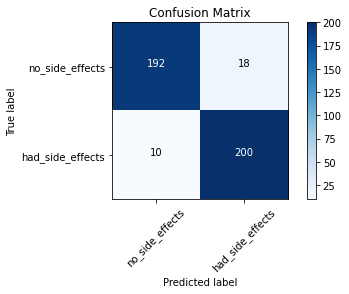

In [35]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Looking at the plot of the confusion matrix, we have the predicted labels on the x-axis and the true labels on the y-axis. The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted. The white cells contain the number of samples that were incorrectly predicted.

There are 420 total samples in the test set. Looking at the confusion matrix, we can see that the model accurately predicted 399 out of 420 total samples. The model incorrectly predicted 21 out of the 420.

For the samples the model got correct, we can see that it accurately predicted that the patients would experience no side effects 199 times. It incorrectly predicted that the patient would have no side effects 10 times when the patient did actually experience side effects.

On the other side, the model accurately predicted that the patient would experience side effects 200 times that the patient did indeed experience side effects. It incorrectly predicted that the patient would have side effects 11 times when the patient actually did not experience side effects.

As you can see, this is a good way we can visually interpret how well the model is doing at its predictions and understand where it may need some work.

### Save And Load A Model With TensorFlow's Keras API

There are a few different ways to save a Keras model. The multiple mechanisms each save the model differently, so we'll check them all out.

#### Saving And Loading The Model In Its Entirety

If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the save() function on the model. To save(), we pass in the file path and name of the file we want to save the model to with an h5 extension.



In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.save(filepath='./data/models/medical_trial_model.h5', overwrite=True, include_optimizer=True)

Note, this function also allows for saving the model as a Tensorflow SavedModel as well if you'd prefer.

This method of saving will save everything about the model – the architecture, the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.

Now that we have this model saved, we can load the model at a later time.

To do so, we first import the load_model() function. Then, we can call the function to load the model by pointing to the saved model on disk.

In [39]:
from tensorflow.keras.models import load_model
loaded_model = load_model(filepath='./data/models/medical_trial_model.h5')

We can verify that the loaded model has the same architecture and weights as the saved model by calling summary() and get_weights() on the model.



In [40]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
for wt_ in loaded_model.get_weights():
    print (wt_.shape)

(1, 16)
(16,)
(16, 32)
(32,)
(32, 2)
(2,)


#### How did we arrive at 642 trainable params:

1. 1 ip. Then 1 hidden layer with 16 nodes. So 16 connections (wts) and 16 (biases): `16x2`

2. Next layer has 32 nodes. `16*32` wts + 32 biases: `(16*32)+32`

3. Last layer has 2 nodes. So `32*2` wts + 2 biases: `32*2+2`

`16*2 + (16*32)+32 + (32*2)+2 = 642`

We can also inspect attributes about the model, like the optimizer and loss by calling model.optimizer and model.loss on the loaded model and compare the results to the previously saved model.

This is the most encompassing way to save and load a model.

#### Saving And Loading Only The Architecture Of The Model

There is another way we save only the architecture of the model. **This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.**

We can do this by calling model.to_json(). This will save the architecture of the model as a JSON string. If we print out the string, we can see exactly what this looks like.



In [42]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "

Now that we have this saved, we can create a new model from it. First we’ll import the needed model_from_json function, and then we can load the model architecture.



In [43]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.get_weights()[0][:10]

array([[ 0.3678811 ,  0.31379175,  0.60994935, -0.0164752 ,  0.10138404,
         0.63157636,  0.6832214 ,  0.39684886, -0.32360592, -0.01685619,
         0.14190254,  0.15136394,  0.00200804,  0.37629166,  0.48280063,
        -0.14148325]], dtype=float32)

In [45]:
model_architecture.get_weights()[0][:10]

array([[-0.5501238 , -0.06719983,  0.07118702, -0.11006641, -0.1526109 ,
        -0.38192594, -0.09217268,  0.2029981 ,  0.10282749, -0.23608181,
        -0.30486915,  0.28960156,  0.01306462, -0.54361564, -0.50872093,
         0.29798478]], dtype=float32)

As we can see the wts are diff as the `model_architecture` weights are untrained and initialized to random

In [46]:
try:
    print (model_architecture.loss, model_architecture.optimizer)
except AttributeError:
    print ("No loss/optimizer found")

No loss/optimizer found


In [47]:
model.loss

'sparse_categorical_crossentropy'

#### Saving And Loading The Weights Of The Model

The last saving mechanism we’ll discuss only saves the weights of the model.

We can do this by calling model.save_weights() and passing in the path and file name to save the weights to with an h5 extension.



In [49]:
model.save_weights(filepath='./data/models/medical_trial_model_weights.h5')

At a later point, we could then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.



In [51]:
new_model_without_wts = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

new_model_without_wts.load_weights('./data/models/medical_trial_model_weights.h5')

In [52]:
new_model_without_wts.get_weights()[0][:10]

array([[ 0.3678811 ,  0.31379175,  0.60994935, -0.0164752 ,  0.10138404,
         0.63157636,  0.6832214 ,  0.39684886, -0.32360592, -0.01685619,
         0.14190254,  0.15136394,  0.00200804,  0.37629166,  0.48280063,
        -0.14148325]], dtype=float32)

In [53]:
model.get_weights()[0][:10]

array([[ 0.3678811 ,  0.31379175,  0.60994935, -0.0164752 ,  0.10138404,
         0.63157636,  0.6832214 ,  0.39684886, -0.32360592, -0.01685619,
         0.14190254,  0.15136394,  0.00200804,  0.37629166,  0.48280063,
        -0.14148325]], dtype=float32)

In [54]:
loaded_model.get_weights()[0][:10]

array([[ 0.3678811 ,  0.31379175,  0.60994935, -0.0164752 ,  0.10138404,
         0.63157636,  0.6832214 ,  0.39684886, -0.32360592, -0.01685619,
         0.14190254,  0.15136394,  0.00200804,  0.37629166,  0.48280063,
        -0.14148325]], dtype=float32)

All 3 are equal as expected

> We’ve now seen how to save only the weights of a model and deploy those weights to a new model, how to save only the architecture and then deploy that architecture to a model, and how to save everything about a model and deploy it in its entirety at a later time. Each of these saving and loading mechanisms may come in useful in differing scenarios.



### Image Preparation For A Convolutional Neural Network With TensorFlow's Keras API


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Using the script below, we'll organize our data into train, validation, and test sets. We'll do this by moving subsets of the data into sub-directories for each separate data set.
Our main data is in the `/data/train` subdirectory

In [5]:
os.chdir(path='C:/Users/shaun/Documents/my_projects/Deep-Learning/Deep Learning with Keras and Tensorflow/Deeplizard Tensorflow Course/data/')
print (os.getcwd())
### make a bunch of directories inside the train directory
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for i in random.sample(glob.glob('train/cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('train/dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('train/cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('train/dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('train/cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('train/dog*'), 50):
        shutil.move(i, 'test/dog')
        
    print ('Moved the data to appropriate directories... Delete the rest')
os.chdir('..')
print (os.getcwd())

C:\Users\shaun\Documents\my_projects\Deep-Learning\Deep Learning with Keras and Tensorflow\Deeplizard Tensorflow Course\data
C:\Users\shaun\Documents\my_projects\Deep-Learning\Deep Learning with Keras and Tensorflow\Deeplizard Tensorflow Course


We first check to see if the directory structure is already in place. If it's not, we proceed with the script. The script first makes train, valid, and test directories, which each contain sub-directories called dog and cat.

The full data set contains 25,000 images, half of which are cats, and half are dogs. We don't need nearly this much data for the tasks we'll be carrying out, so we're going to work with a subset. The remainder of the script moves 1000 samples into the training set, 200 samples into the validation set, and 100 samples into the test set. Each set has have an equal amount of cats and dogs.

The remainder of the unused data will remain in the base `data/train` directory. Feel free to remove this data if you'd like.

#### Process The Data

We've already imported all the TensorFlow and Keras modules above. If you're using a GPU (not required), then we can check to be sure that TensorFlow is able to identify the GPU using the code below. 

In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


We then create variables for which the the paths to the train, valid, and test data directories are assigned.

In [7]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

We can either specify an absolute path or a relative path relative to where our Jupyter notebook resides. I'm specifying the relative path.

Now, we use Keras' `ImageDataGenerator` class to create batches of data from the train, valid, and test directories.



In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


ImageDataGenerator.flow_from_directory() creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.

Notice, to ImageDataGenerator for each of the data sets, we specify preprocessing_function=tf.keras.applications.vgg16.preprocess_input. For now, just understand this does an additional processing step on the images. We'll cover what exactly this processing is when we work with the pre-trained VGG16 CNN in a future episode.

To flow_from_directory(), we first specify the path for the data. We then specify the target_size of the images, which will resize all images to the specified size. The size we specify here is determined by the input size that the neural network expects.

The classes parameter expects a list that contains the underlying class names, and lastly, we specify the batch_size.

We also specify shuffle=False only for test_batches. That's because, later when we plot the evaluation results from the model to a confusion matrix, we'll need to able to access the unshuffled labels for the test set. By default, the data sets are shuffled.

Note, in the case where you do not know the labels for the test data, you will need to modify the test_batches variable. Specifically, the change will be to set the parameters classes = None and class_mode = None in flow_from_directory().



### Visualize The Data

We now call next(train_batches) to generate a batch of images and labels from the training set. Note that the size of this batch is determined by the batch_size we set when we created train_batches.

In [9]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [10]:
from PIL import Image
print(Image.__file__)

c:\users\shaun\documents\my_projects\gpu_acclerated\lib\site-packages\PIL\Image.py


In [11]:
import Image
print(Image.__file__)

c:\users\shaun\documents\my_projects\gpu_acclerated\lib\site-packages\PIL\Image.py


In [12]:
imgs, labels = next(train_batches)
print (imgs.shape) ## batch_size, ht, width, channels
print (labels.shape)
print (labels)

(10, 224, 224, 3)
(10, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

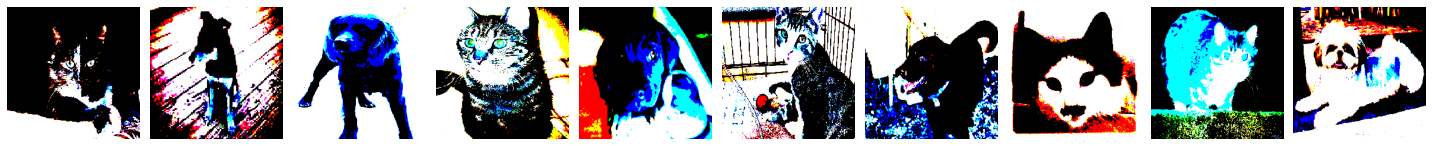

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [14]:
plotImages(imgs)
print(labels)

This is what the first processed random batch from the training set looks like. Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets, which we'll talk about in an upcoming episode. Don't worry about it for now, just know that the RGB pixel data has been processed in such a way that the image data now looks like this before being passed to the network.

Note that dogs are represented with the one-hot encoding of `[0,1]`, and cats are represented by `[1,0]`.

### Build And Train A Convolutional Neural Network With TensorFlow's Keras API

In [15]:
model = Sequential(layers=[
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

- Note how the image size in the conv layers are preserved because we have applied zero padding by `padding=same`

- Also notice how in MaxPool the size is halved

- Finally, see how the number of filters == no of output channels as each filter creates a new feature map by convolving the input image

We Flatten the output from the convolutional layer and pass it to a Dense layer. This Dense layer is the output layer of the network, and so it has 2 nodes, one for cat and one for dog. We’ll use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of cat and dog.

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use binary_crossentropy as our loss, rather than categorical_crossentropy. Both options work equally well and achieve the exact same result.

With binary_crossentropy, however, the last layer would need to use sigmoid, rather than softmax, as its activation function.

Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use binary_crossentropy as our loss, rather than categorical_crossentropy. Both options work equally well and achieve the exact same result.

With binary_crossentropy, however, the last layer would need to use sigmoid, rather than softmax, as its activation function.

#### Train A Simple CNN

We've already introduced the model.fit() function to train a model in a previous episode. We'll be using it in the same fashion here, except for now, we'll be passing in our newly introduced DirectoryIterators train_batches and valid_batches to train and validate the model. Recall, these were created in the last episode.

In [18]:
print (len(train_batches), len(valid_batches), len(next(train_batches)[0]), len(next(valid_batches)[0])) # batch size of training data, batch size of valid data

print (f'Total train size = {len(train_batches)*len(next(train_batches)[0])}')
print (f'Total valid size = {len(valid_batches)*len(next(valid_batches)[0])}')

100 20 10 10
Total train size = 1000
Total valid size = 200


In [19]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 7s - loss: 17.1265 - accuracy: 0.5180 - val_loss: 20.5661 - val_accuracy: 0.5000
Epoch 2/10
100/100 - 3s - loss: 2.3883 - accuracy: 0.7680 - val_loss: 2.6688 - val_accuracy: 0.6200
Epoch 3/10
100/100 - 3s - loss: 0.3668 - accuracy: 0.9110 - val_loss: 2.9599 - val_accuracy: 0.6350
Epoch 4/10
100/100 - 3s - loss: 0.2117 - accuracy: 0.9380 - val_loss: 2.7371 - val_accuracy: 0.6000
Epoch 5/10
100/100 - 3s - loss: 0.0370 - accuracy: 0.9860 - val_loss: 2.2096 - val_accuracy: 0.6300
Epoch 6/10
100/100 - 3s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.2126 - val_accuracy: 0.6400
Epoch 7/10
100/100 - 3s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1714 - val_accuracy: 0.6400
Epoch 8/10
100/100 - 3s - loss: 8.3692e-04 - accuracy: 1.0000 - val_loss: 2.1694 - val_accuracy: 0.6350
Epoch 9/10
100/100 - 3s - loss: 6.9513e-04 - accuracy: 1.0000 - val_loss: 2.1734 - val_accuracy: 0.63

> To learn more on why certain arguments have been passed to the `model.fit` method read the documentation where everything is explained in great detail: https://keras.io/api/models/model_training_apis/

validation_steps: Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

We need to specify steps_per_epoch to indicate how many batches of samples from our training set should be passed to the model before declaring one epoch complete. Since we have 1000 samples in our training set, and our batch size is 10, then we set steps_per_epoch to be 100, since 100 batches of 10 samples each will encompass our entire training set.

We're able to use len(train_batches) as a more general way to specify this value, as the length of train_batches is equal to 100 since it is made up of 100 batches of 10 samples. Similarly, we specify validation_steps in the same fashion but with using valid_batches.

We’re specifying 10 as the number of epochs we’d like to run, and setting the verbose parameter to 2, which just specifies the verbosity of the log output printed to the console during training.

When we run this line of code, we can see the output of the model over 10 epochs.

--- 

From this output, we can see the performance of this simple model on the training set is great, with accuracy reaching 100% and loss nearing 0, however, by comparing these results to the validation metrics, we can see that our model is vastly overfitting to the training data.



### Convolutional Neural Network Predictions With TensorFlow's Keras API

Last time, we built and trained our very first CNN. We observed that this model performed well on the training set, but didn’t do so well generalizing to the validation set. None-the-less, we’re now going to see how this model holds up to predicting on images of cats and dogs in our test set.

Given the less-than-decent results we saw from the validation performance, our expectation is that the model likely won’t perform any better on the test set. Regardless of the results though, the steps we’re about to go through will expose us to the general process for using a CNN for inference.

#### Preparing The Test Data

We’ll now run `next(test_batches)` to extract a batch of images and their corresponding labels from the test set.



In [20]:
test_imgs, test_labels = next(test_batches)

print (test_imgs.shape, test_labels.shape)

(10, 224, 224, 3) (10, 2)


Recall, test_batches was created in a previous episode and was created using Keras ImageDataGenerator.flow_from_directory() to generate batches of data from the test set that resides on disk.

Using the plotImages() function we previously introduced, we can see what this batch of test data looks like.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

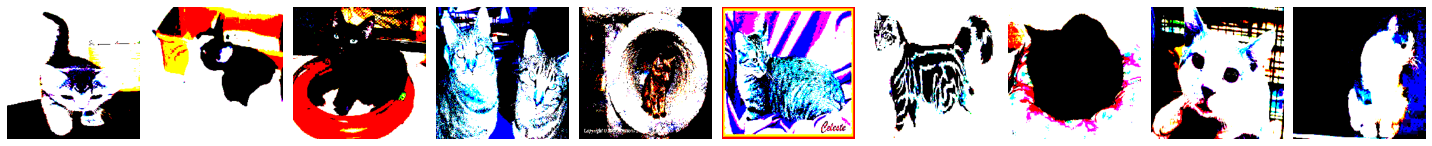

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
plotImages(test_imgs)
print (test_labels)

Just as we saw before, cats are labeled with a one-hot encoding of `[1,0]`, and dogs are labeled as `[0,1]`.

Note, because we chose to not shuffle our test set when we originally created it, the first half of the test data is all cats, and the second half is all dogs. Also, recall that the color data appears skewed due to the VGG16 preprocessing we specified when we created the data sets.



In [22]:
test_batches.batch_size, test_batches.classes

(10,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

#### Predicting On The Test Data

Now we’ll use our previously built model and call `model.predict()` to have the model predict on the test set.



In [23]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [24]:
predictions.shape, predictions[:5]

((100, 2),
 array([[9.8063433e-01, 1.9365659e-02],
        [9.9300569e-01, 6.9943271e-03],
        [9.9940312e-01, 5.9688807e-04],
        [3.8417122e-01, 6.1582881e-01],
        [5.2986974e-01, 4.7013026e-01]], dtype=float32))

We pass in the test set, test_batches, and set steps to be then length of test_batches. Similar to steps_per_epoch that was introduced in the last episode, steps specifies how many batches to yield from the test set before declaring one prediction round complete.

After running the predictions, we can print our the rounded predictions see what they look like.



In [25]:
np.round(predictions)[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [26]:
np.argmax(predictions, axis=-1)[:5]

array([0, 0, 0, 1, 0], dtype=int64)

These are the labels that the model is predicting for our images.

#### Plotting Predictions With A Confusion Matrix

To get a better visualization of these results, we’ll plot them in a confusion matrix, which we've covered in detail in a previous episode.

We create the confusion matrix using scikit-learn, which we imported a couple episodes back.

In [27]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

To the confusion matrix, we pass the true labels of the test set, along with the predicted labels for the test set from the model.

Note, we can access the unshuffled true labels for the test set by calling `test_batches.classes`.

We transform the one-hot encoded predicted labels to be in the same format as the true labels by only selecting the element with the highest value for each prediction using `np.argmax(predictions, axis=-1)`.

We then define the plot_confusion_matrix() function that is copied directly from scikit-learn.



In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We can then inspect the class_indices for the labels so that we know in which order to pass them to our confusion matrix.



In [29]:
test_batches.class_indices, train_batches.class_indices

({'cat': 0, 'dog': 1}, {'cat': 0, 'dog': 1})

Confusion matrix, without normalization
[[32 18]
 [17 33]]


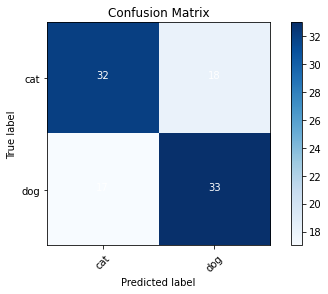

In [30]:
cm_plot_labels = ['cat','dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
(27+34)/(27+34+16+23)

0.61

accuracy is around 61%

Given what we saw last time from the validation metrics, these results are not surprising.



### Fine-Tune VGG16 Image Classifier With Keras | Part 1: Build

#### VGG16 And ImageNet

The pre-trained model we'll be working with to classify images of cats and dogs is called VGG16, which is the model that won the 2014 ImageNet competition.

In the ImageNet competition, multiple teams compete to build a model that best classifies images from the ImageNet library. The ImageNet library houses thousands of images belonging to **1000** different categories.

We’ll import this VGG16 model and then fine-tune it using Keras. The fine-tuned model will not classify images as one of the 1000 categories for which it was trained on, but instead it will only work to classify images as either cats or dogs.

> Note that dogs and cats were included in the ImageNet library from which VGG16 was originally trained. Therefore, the model has already learned the features of cats and dogs. Given this, the fine-tuning we'll do on this model will be very minimal. In later episodes, we'll do more involved fine-tuning and utilize transfer learning to classify completely new data than what was included in the training set.

#### VGG16 Preprocessing

When we previously inspected these images, we briefly discussed that the color data was skewed as a result of preprocessing the images using the `tf.keras.applications.vgg16.preprocess_input` function

To understand what preprocessing is needed for images that will be passed to a VGG16 model, we can look at the [VGG16 paper](https://arxiv.org/pdf/1409.1556.pdf).

Under the 2.1 Architecture section, we can see that the authors stated that, "The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."


This is the preprocessing that was used on the original training data, and therefore, this is the way we need to process images before passing them to VGG16 or a fine-tuned VGG16 model.

This processing is what is causing the underlying color data to look distorted.

#### Building A Fine-Tuned Model


Next, we’ll import the VGG16 model from Keras. 

In [32]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 899s 2us/step


The original trained VGG16 model, along with its saved weights and other parameters, is now downloaded onto our machine.

We can check out a summary of the model just to see what the architecture looks like.


In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [41]:
tf.keras.utils.plot_model(model=vgg16_model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In contrast, recall how much simpler the CNN was that we worked with in the last episode. VGG16 is much more complex and sophisticated and has many more layers than our previous model.

Notice that the last Dense layer of VGG16 has 1000 outputs. These outputs correspond to the 1000 categories in the ImageNet library.

Since we’re only going to be classifying two categories, cats and dogs, we need to modify this model in order for it to do what we want it to do, which is to only classify cats and dogs.

Before we do that, note that the type of Keras models we’ve been working with so far in this series have been of type **Sequential**.

If we check out the type of model vgg16_model is, we see that it is of type `Model`, which is from the Keras’ **Functional API**.



In [42]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

We’ve not yet worked with the more sophisticated Functional API, although we will work with it in later episodes using the MobileNet model.

For now, we’re going to go through a process to convert the Functional model to a Sequential model, so that it will be easier for us to work with given our current knowledge.

We first create a new model of type Sequential. We then iterate over each of the layers in vgg16_model, except for the last layer, and add each layer to the new Sequential model.

In [43]:
## create a blank Sequential model
model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Now, we have replicated the entire vgg16_model (excluding the output layer) to a new Sequential model, which we've just given the name model.

Next, we’ll iterate over each of the layers in our new Sequential model and set them to be non-trainable. **This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of cats and dogs.** We want this because the vgg16 model has already been trained on 1000 classes which includes cats and dogs.

In [45]:
for layer in model.layers:
    layer.trainable=False

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Ok, so the number of trainable params is now set to zero

> The reason we don’t want to retrain these layers is because, as mentioned earlier, cats and dogs were already included in the original ImageNet library. So, VGG16 already does a nice job at classifying these categories. We only want to modify the model such that the output layer understands only how to classify cats and dogs and nothing else. Therefore, we don’t want any re-training to occur on the earlier layers.

Next, we add our new output layer, consisting of only 2 nodes that correspond to cat and dog. This output layer will be the only trainable layer in the model.

In [47]:
model.add(Dense(units=2, activation='softmax'))

We can now check out a summary of our model and see that everything is exactly the same as the original vgg16_model, except for now, the output layer has only 2 nodes, rather than 1000, and the number of trainable parameters has drastically decreased since we froze all the parameters in the earlier layers.



In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Fine-Tune VGG16 Image Classifier With Keras | Part 2: Train

Using our new model, the first thing we'll do is compile it.

Similar to how we’ve compiled models in previous episodes, we’ll use the Adam optimizer with a learning rate of 0.0001, categorical_crossentropy as our loss, and ‘accuracy’ as our metric.

In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Note that the call to fit() is exactly the same as it was when we used it on the original CNN we built from scratch in a previous episode, except for we're only running 5 epochs this time, as opposed to 10.

In [50]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/5
100/100 - 21s - loss: 0.4133 - accuracy: 0.8320 - val_loss: 0.1486 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 16s - loss: 0.0898 - accuracy: 0.9690 - val_loss: 0.0848 - val_accuracy: 0.9700
Epoch 3/5
100/100 - 16s - loss: 0.0552 - accuracy: 0.9790 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 4/5
100/100 - 16s - loss: 0.0395 - accuracy: 0.9900 - val_loss: 0.0570 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 16s - loss: 0.0303 - accuracy: 0.9960 - val_loss: 0.0492 - val_accuracy: 0.9800


Looking at the results from training, we can see just after 5 epochs, we have some pretty outstanding results, especially when you compare it to the results we got from our original model.

The most noticeable improvement is that this model is generalizing very well to the validation data, unlike the CNN we build from scratch previously.

### Fine-Tune VGG16 Image Classifier With Keras | Part 3: Predict

Picking up with the code, we’ll first get a batch of test samples and their corresponding labels from the test set, and plot them to see what the data looks like.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

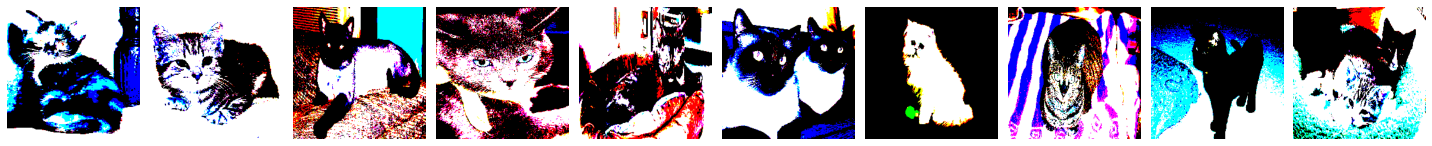

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [51]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

Recall that this is the same test set we used in a previous episode to test the model we built from scratch, and the color in the images appears to be distorted due to the VGG16 preprocessing we discussed previously.

We now call model.predict to have the model predict on the test data.

In [52]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [53]:
predictions[:5]

array([[9.99612510e-01, 3.87548556e-04],
       [8.88055682e-01, 1.11944236e-01],
       [9.99310136e-01, 6.89830398e-04],
       [9.99994516e-01, 5.47458922e-06],
       [4.70764153e-02, 9.52923536e-01]], dtype=float32)

Confusion matrix, without normalization
[[48  2]
 [ 0 50]]


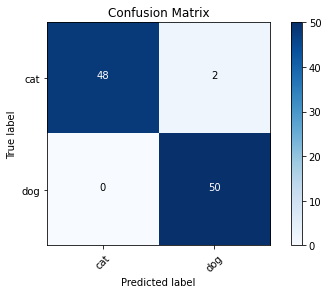

In [54]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [55]:
(48+50)/100

0.98

The accuracy is 98%, exactly the same as the validation accuracy!